In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

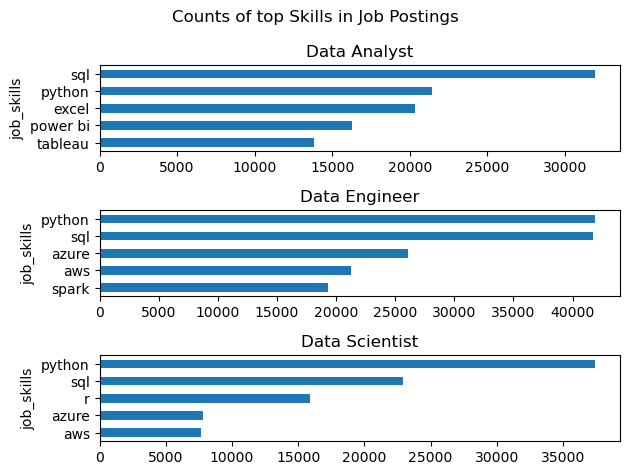

In [102]:
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", 
    "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", 
    "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", 
    "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", 
    "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", 
    "Vatican City"
]

df_europe = df[df['job_country'].isin(european_countries)].copy()
df_skills = df_europe.explode('job_skills')


skills_count = df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count')
skills_count.sort_values(by='skill_count',ascending=False,inplace=True)


job_titles = skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])


job_posting = df_europe['job_title_short'].value_counts().reset_index(name = 'job_count')


jobs_europe_perc = pd.merge(skills_count,job_posting, how = 'left', on='job_title_short')
jobs_europe_perc['skills_percent'] = 100 * jobs_europe_perc['skill_count'] / jobs_europe_perc['job_count']


fig,ax = plt.subplots(len(job_titles) , 1)
for i,job_title in enumerate(job_titles):
    df_plot = skills_count[skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills', y='skill_count',ax=ax[i],title = job_title,legend = False)
    ax[i].invert_yaxis()

fig.suptitle('Counts of top Skills in Job Postings') 
plt.tight_layout() 


    

    


In [103]:
jobs_europe_perc

,job_skills,job_title_short,skill_count,job_count,skills_percent
0,python,Data Engineer,41920,74578,56.209606
1,sql,Data Engineer,41772,74578,56.011156
2,python,Data Scientist,37439,58355,64.157313
3,sql,Data Analyst,31954,71703,44.564384
4,azure,Data Engineer,26085,74578,34.976803
...,...,...,...,...,...
2073,smartsheet,Software Engineer,1,18064,0.005536
2074,capacitor,Business Analyst,1,16496,0.006062
2075,blazor,Senior Data Engineer,1,16299,0.006135
2076,blazor,Machine Learning Engineer,1,6189,0.016158


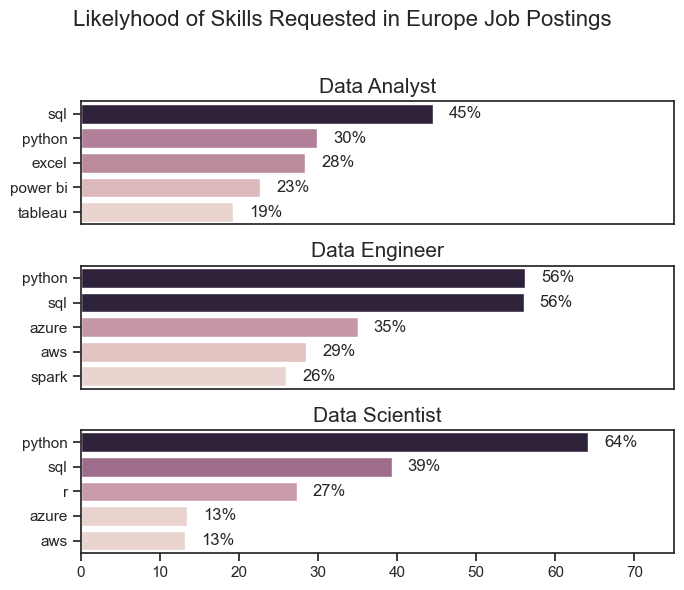

In [156]:
fig,ax = plt.subplots(len(job_titles) , 1,figsize=(7, 6 ))
sns.set_theme(style= 'ticks')
for i,job_title in enumerate(job_titles):
    df_plot = jobs_europe_perc[jobs_europe_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data = df_plot , x='skills_percent',y='job_skills',ax = ax[i] , hue = 'skill_count',legend = False)

    ax[i].set_xlim(0,75)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title, fontsize = 15)
    

    for n,v in enumerate(df_plot['skills_percent']):
        ax[i].text(v + 2 , n , f'{v:.0f}%', va = 'center')
        
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelyhood of Skills Requested in Europe Job Postings',fontsize = 16) 
plt.tight_layout(rect=[0, 0, 1, 0.96])
